Lab 2 - Image Processing


In [1]:
!pip install opencv-python matplotlib ipywidgets


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider


In [ ]:
# Đọc ảnh mẫu (đổi thành ảnh bạn cần)
img_bgr = cv2.imread(
    'E:\MSE\HomeWork\Ky 2\IVP501\Lab & Test & Project\Lab 2\image009.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


In [ ]:
# Hiển thị histogram
def display_histogram(img, title='Histogram'):
    plt.figure(figsize=(6, 4))
    if len(img.shape) == 2:
        plt.hist(img.ravel(), 256, [0, 256], color='gray')
    else:
        for i, col in enumerate(['r', 'g', 'b']):
            plt.hist(img[:, :, i].ravel(), 256, [0, 256], color=col, alpha=0.5)
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [ ]:
# Function 1: Color balance
def color_balance(r_gain=1.0, g_gain=1.0, b_gain=1.0):
    b, g, r = cv2.split(img_bgr)
    r = np.clip(r * r_gain, 0, 255).astype(np.uint8)
    g = np.clip(g * g_gain, 0, 255).astype(np.uint8)
    b = np.clip(b * b_gain, 0, 255).astype(np.uint8)
    balanced = cv2.merge([b, g, r])
    balanced_rgb = cv2.cvtColor(balanced, cv2.COLOR_BGR2RGB)

    # So sánh ảnh gốc và ảnh đã chỉnh
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(balanced_rgb)
    plt.title(f"Balanced R:{r_gain} G:{g_gain} B:{b_gain}")
    plt.axis('off')
    plt.show()

    display_histogram(img_rgb, title="Histogram - Original")
    display_histogram(balanced_rgb, title="Histogram - Balanced")

    # Tạo sliders để chỉnh
interact(color_balance,
         r_gain=FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0),
         g_gain=FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0),
         b_gain=FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0))


interactive(children=(FloatSlider(value=1.0, description='r_gain', max=2.0, min=0.5), FloatSlider(value=1.0, d…

<function __main__.color_balance(r_gain=1.0, g_gain=1.0, b_gain=1.0)>

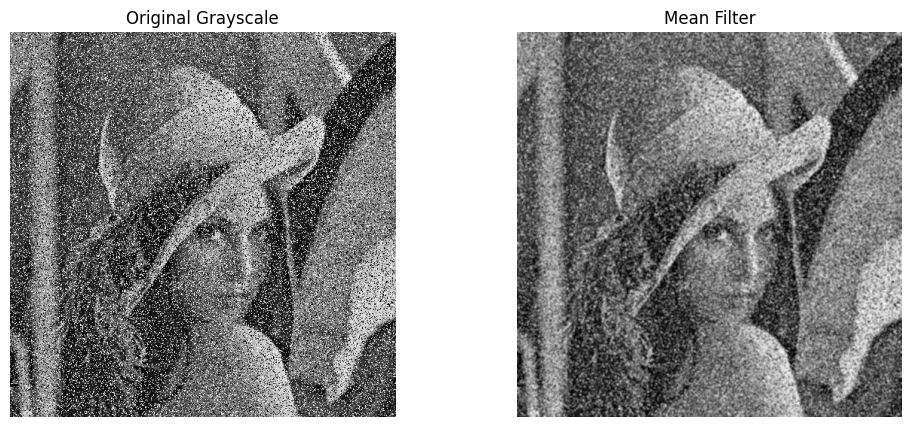

C:\Users\Admin\AppData\Local\Temp\ipykernel_16056\2392616830.py:5: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256], color='gray')


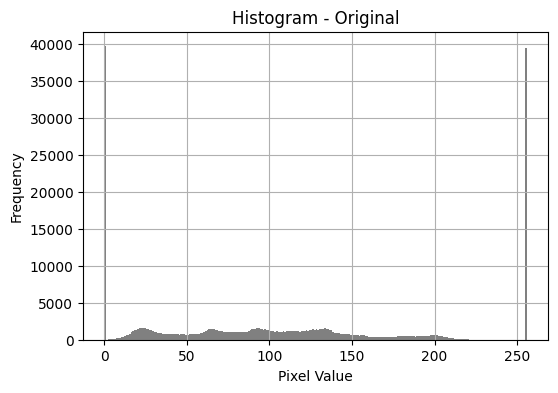

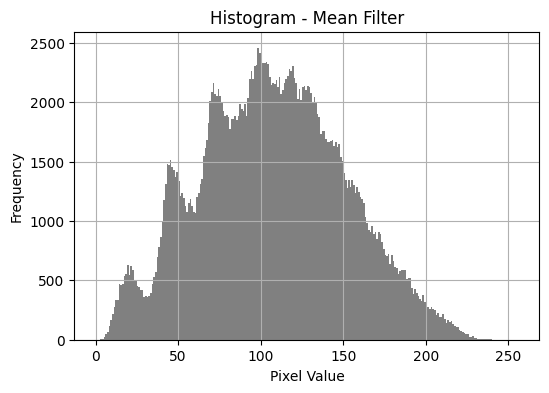

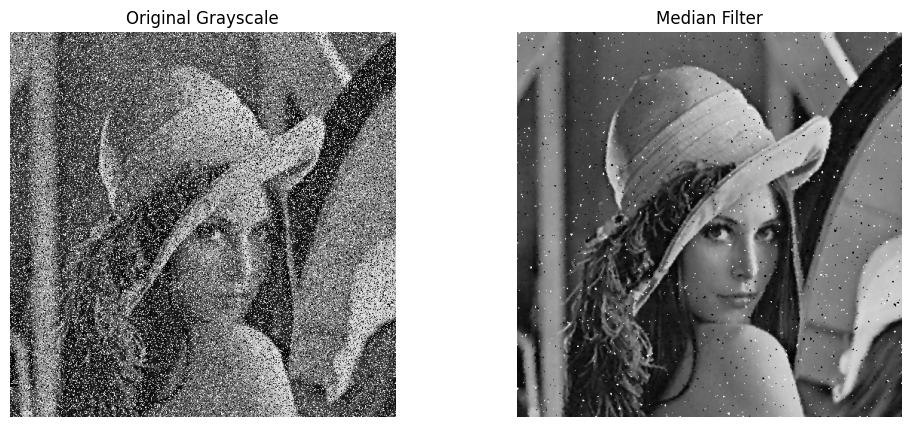

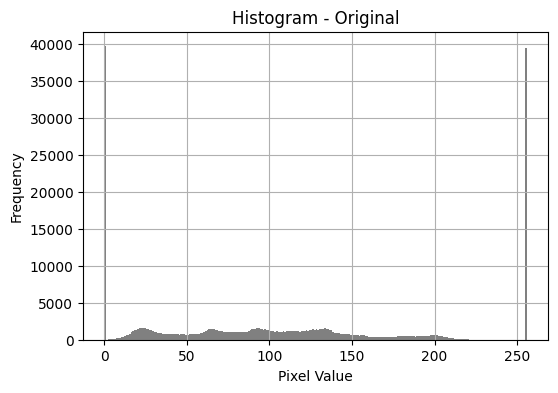

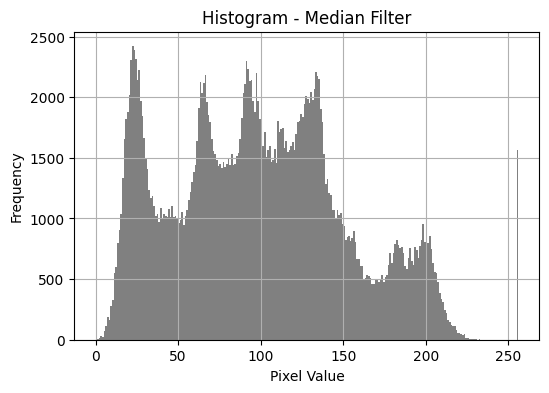

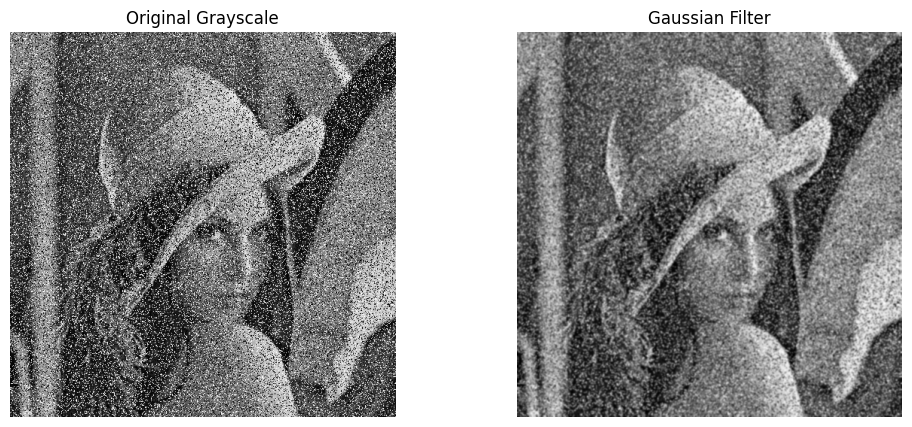

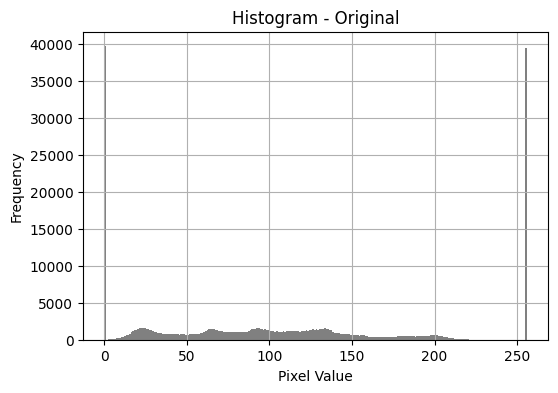

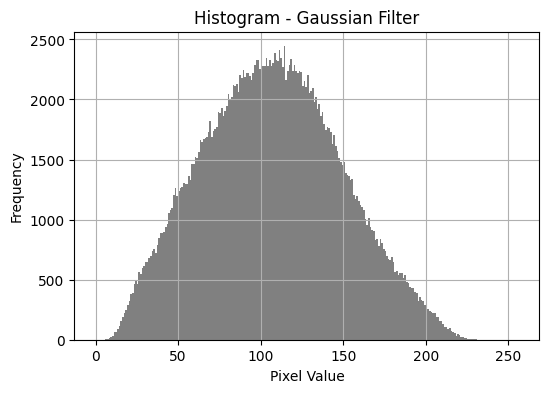

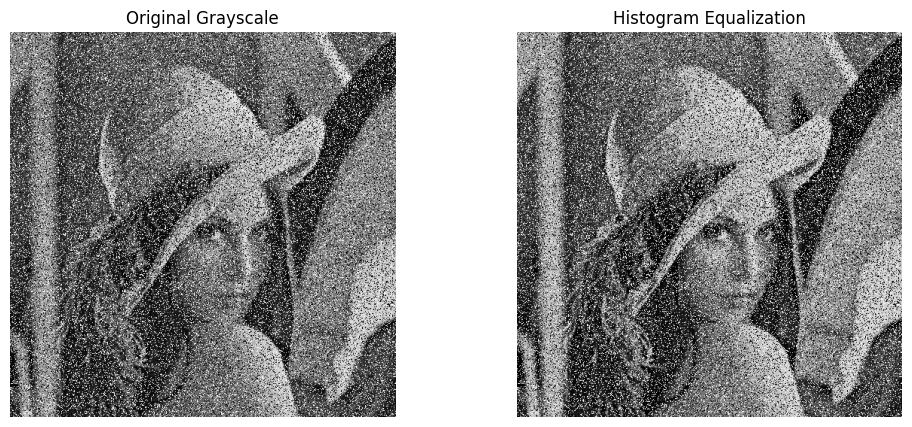

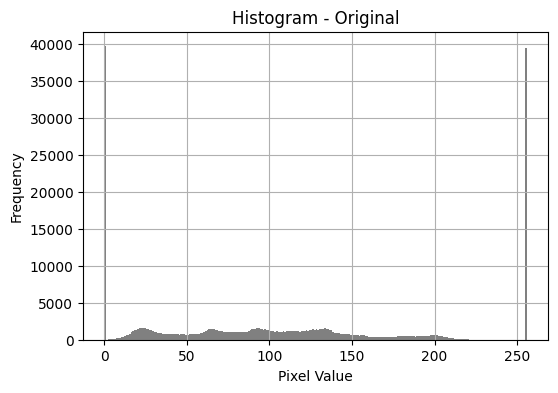

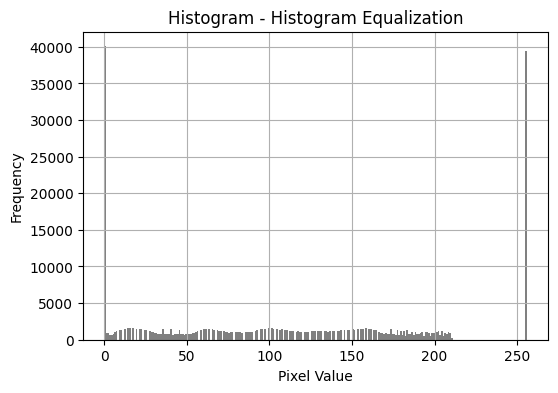

In [ ]:
def apply_filter_and_plot(img_gray, filter_func, title):
    filtered = filter_func(img_gray)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Original Grayscale")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

    display_histogram(img_gray, title="Histogram - Original")
    display_histogram(filtered, title=f"Histogram - {title}")


# Mean filter
apply_filter_and_plot(img_gray, lambda x: cv2.blur(x, (3, 3)), "Mean Filter")

# Median filter
apply_filter_and_plot(
    img_gray, lambda x: cv2.medianBlur(x, 3), "Median Filter")

# Gaussian filter
apply_filter_and_plot(img_gray, lambda x: cv2.GaussianBlur(
    x, (5, 5), 1.0), "Gaussian Filter")

# Histogram Equalization


def histogram_equalization(img_gray):
    eq = cv2.equalizeHist(img_gray)
    apply_filter_and_plot(img_gray, lambda _: eq, "Histogram Equalization")


histogram_equalization(img_gray)
